   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.2 MB/s eta 0:00:00


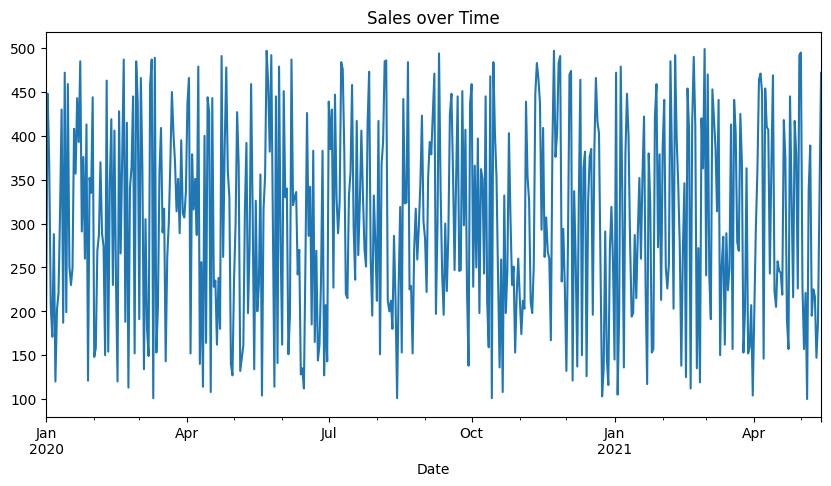

Training ARIMA model...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5758.734, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5159.411, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5500.677, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5065.097, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5021.086, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=5013.085, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=5002.784, Time=0.19 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.98 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=4917.362, Time=0.26 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=4916.273, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4917.340, Time=0.14 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=4918.225, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0] 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


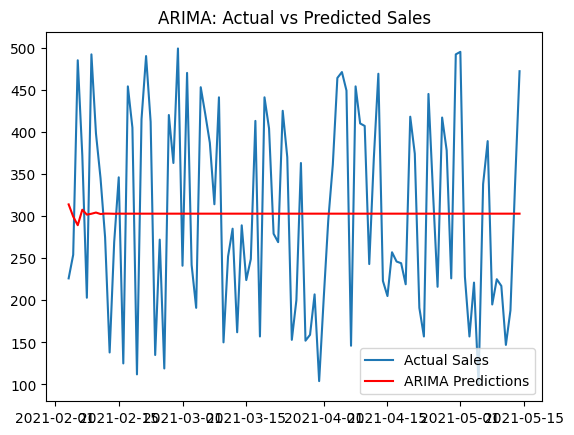

ARIMA RMSE: 117.36798812699742

Training Prophet model...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphuxfi9fw/l4ycqg46.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphuxfi9fw/7pscp75e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1525', 'data', 'file=/tmp/tmphuxfi9fw/l4ycqg46.json', 'init=/tmp/tmphuxfi9fw/7pscp75e.json', 'output', 'file=/tmp/tmphuxfi9fw/prophet_modelsemk6bxp/prophet_model-20240901113722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:37:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:37:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/p

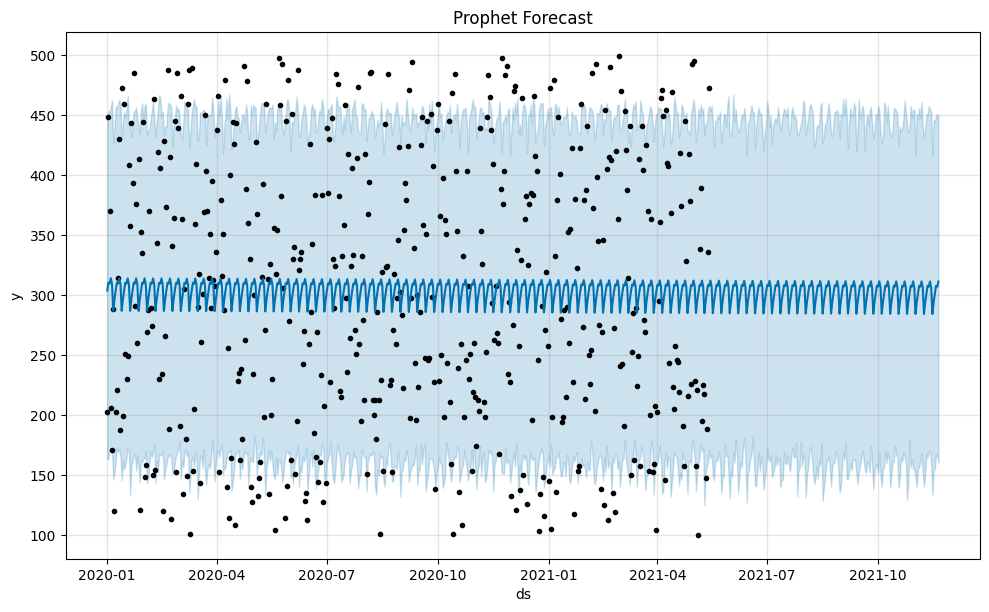

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


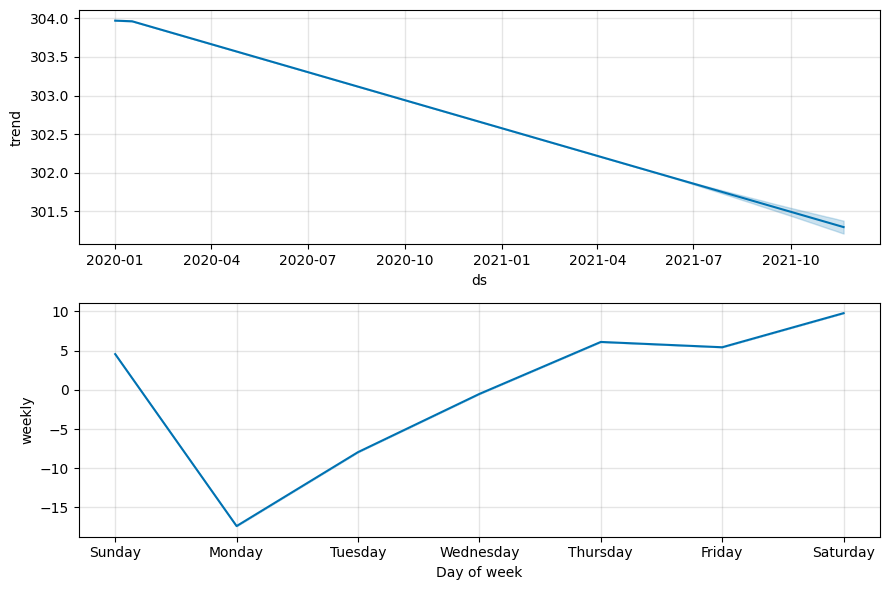

Prophet RMSE: 116.66842980965909

ARIMA RMSE: 117.36798812699742
Prophet RMSE: 116.66842980965909
Prophet performed better!


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from prophet import Prophet
!pip install pmdarima
from pmdarima import auto_arima

# Generate example dataset (replace this with your actual sales data)
np.random.seed(42)
data = {'Date': pd.date_range(start='2020-01-01', periods=500, freq='D'),
        'Sales': np.random.randint(100, 500, size=500)}
df = pd.DataFrame(data)

# Ensure Date is a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Plot the sales data
df['Sales'].plot(figsize=(10, 5), title='Sales over Time')
plt.show()

# Split the data into train and test sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df['Sales'][:train_size], df['Sales'][train_size:]

# ------------------ ARIMA Model ------------------ #
print("Training ARIMA model...")

# Automatically select best ARIMA (p,d,q) parameters
auto_model = auto_arima(train, seasonal=False, trace=True)
print(auto_model.summary())

# Fit the ARIMA model
arima_model = ARIMA(train, order=auto_model.order)
arima_model_fit = arima_model.fit()

# Forecast using ARIMA
arima_predictions = arima_model_fit.forecast(steps=len(test))

# Plot ARIMA predictions vs actual sales
plt.plot(test.index, test.values, label='Actual Sales')
plt.plot(test.index, arima_predictions, color='red', label='ARIMA Predictions')
plt.legend()
plt.title('ARIMA: Actual vs Predicted Sales')
plt.show()

# Evaluate ARIMA model
arima_rmse = np.sqrt(mean_squared_error(test, arima_predictions))
print(f'ARIMA RMSE: {arima_rmse}\n')

# ------------------ Prophet Model ------------------ #
print("Training Prophet model...")

# Prepare data for Prophet
df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Sales': 'y'})

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Create future dates for Prophet (including test period + 90 days forecast)
future_dates = prophet_model.make_future_dataframe(periods=len(test) + 90)

# Forecast using Prophet
prophet_forecast = prophet_model.predict(future_dates)

# Plot Prophet forecast
prophet_model.plot(prophet_forecast)
plt.title('Prophet Forecast')
plt.show()

# Plot Prophet components (trend, weekly/yearly seasonality)
prophet_model.plot_components(prophet_forecast)
plt.show()

# Extract Prophet predictions for the test period
prophet_test_forecast = prophet_forecast[prophet_forecast['ds'].isin(test.index)]

# Evaluate Prophet model
prophet_rmse = np.sqrt(mean_squared_error(test, prophet_test_forecast['yhat']))
print(f'Prophet RMSE: {prophet_rmse}\n')

# ------------------ Comparison of Models ------------------ #
print(f"ARIMA RMSE: {arima_rmse}")
print(f"Prophet RMSE: {prophet_rmse}")

if arima_rmse < prophet_rmse:
    print("ARIMA performed better!")
else:
    print("Prophet performed better!")

